# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [40]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

df = pd.read_csv(r"C:\Users\joseb\Documents\the_bridge\ONLINE_DS_THEBRIDGE_jbenegasb\modulo_1\2509_dsft_thebridge\3-Machine Learning\1-Supervisado\3-RegorClass\5-Decision_Trees\ejercicio\data\temps.csv")
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [42]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [43]:
df['week']

0        Fri
1        Sat
2        Sun
3        Mon
4       Tues
       ...  
343     Tues
344      Wed
345    Thurs
346      Fri
347      Sat
Name: week, Length: 348, dtype: object

In [75]:
# LabelEncoder




pd.get_dummies(df['week']).head()


# Resultado: df con columna original y codificada



,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False


In [47]:
my_week = {'Mon':1, 'Tues':2, 'Wed':3, 'Thurs':4, 'Fri':5, 'Sat':6, 'Sun':7}
df['week_int'] = df['week'].replace(my_week)
df.head()

C:\Users\joseb\AppData\Local\Temp\ipykernel_30060\1857932663.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week_int'] = df['week'].replace(my_week)


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2


In [50]:

df['autumn'] = df['month'].apply(lambda x: 1 if (x > 8 and x < 13) else 0)
df['winter'] = df['month'].apply(lambda x: 1 if (x > 0 and x < 3) else 0)
df['spring'] = df['month'].apply(lambda x: 1 if (x > 2 and x < 6) else 0)
df['summer'] = df['month'].apply(lambda x: 1 if (x > 5 and x < 9) else 0)
df.head()


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0


In [ ]:
df['autumn'] = np.where(df['month'].isin([10,11,12], 1, 0))
df['winter'] = np.where(df['month'].isin([1,2,3], 1, 0))
df['spring'] = np.where(df['month'].isin([4,5,6], 1, 0))
df['summer'] = np.where(df['month'].isin([7,8,9], 1, 0))

In [36]:
# 1) calcular la matriz de correlación (por defecto Pearson)
corr_matrix = df[["month", "actual"]].corr()

# 2) formatear (opcional) para mostrar con 6 decimales como en tu ejemplo
corr_matrix = corr_matrix.round(6)

print(corr_matrix)


           month    actual
month   1.000000  0.004529
actual  0.004529  1.000000


,month,actual
month,1.000000,0.004529
actual,0.004529,1.000000


In [ ]:
# Mapeo de meses a estaciones o categorías de temperatura
# 1: Verano (más cálido), 4: Invierno (más frío)
my_month = {1:4, 2:4, 3:6, # Invierno
            4:7, 5:8, # Primavera
            6:9, 7:10, 8:1, 9:2, # Verano/Cálido
            10:1, 11:2, 12:3} # Otoño
df['month_int'] = df['month'].replace(my_month)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,month_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,month_int
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,2,1,0,0,0,3
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,3,1,0,0,0,3
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4,1,0,0,0,3
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,5,1,0,0,0,3


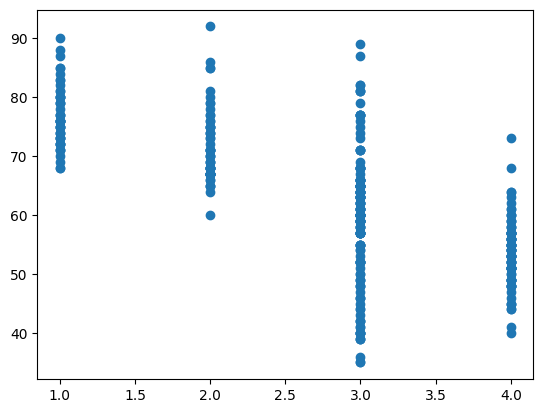

In [55]:
plt.scatter(df['month_int'], df['actual'])

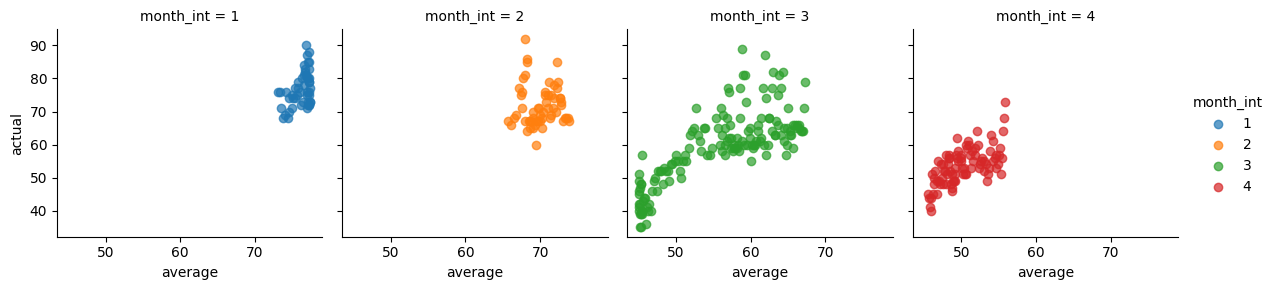

In [56]:
g = sns.FacetGrid(df, col="month_int", hue="month_int")
g.map(plt.scatter, "average", "actual", alpha=.7)
g.add_legend()

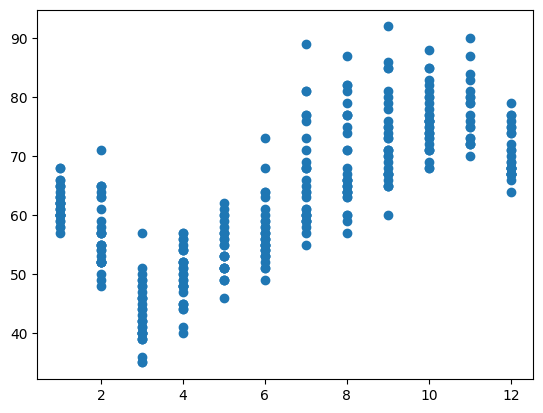

,month_int,actual
month_int,1.0000,0.6811
actual,0.6811,1.0000


<Axes: >

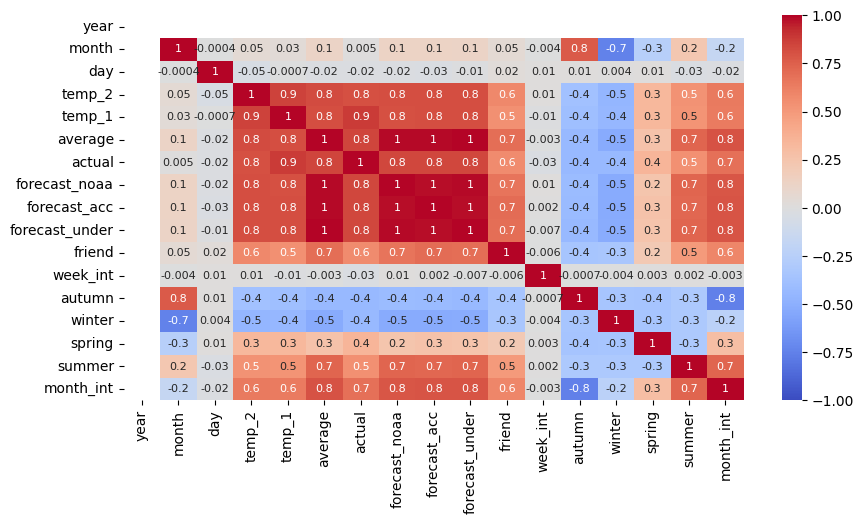

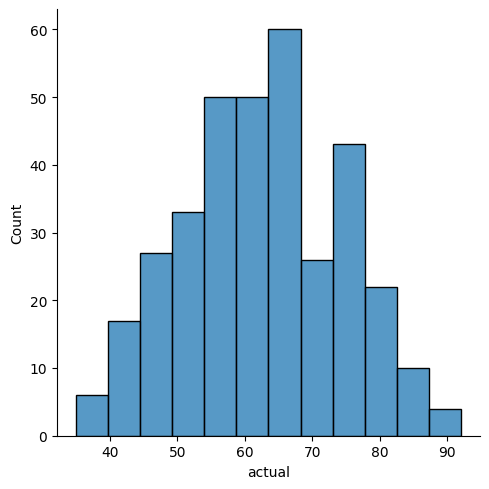

### 3. Selecciona variables y divide en train y test

In [58]:
features = ['temp_2', 'temp_1', 'average', 'month_int', 'summer', 'winter']
X = df[features]
y = df['actual']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 6)
(70, 6)
(278,)
(70,)


### 4. Entrena el modelo


In [61]:
# Instanciar y entrenar el modelo de regresión (sin max_depth)
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predecir en test
y_pred = tree_reg.predict(X_test)

# Calcular R2 en test
r2_score(y_test, y_pred)

0.7317060355195404

In [62]:
# Predecir en train
y_pred_train = tree_reg.predict(X_train)

# Calcular R2 en train
r2_score(y_train, y_pred_train)

1.0

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [63]:
print(f"MAE test {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE test {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"MSE test {mean_squared_error(y_test, y_pred)}")
print(f"RMSE test {np.sqrt(mean_squared_error(y_test, y_pred))}")

MAE test 4.714285714285714
MAPE test 0.07534897446941473
MSE test 37.51428571428571
RMSE test 6.1248906695781695


MAE train 0.0
MAPE train 0.0
MSE train 0.0
RMSE train 0.0


### 6. Representa el árbol de decisión

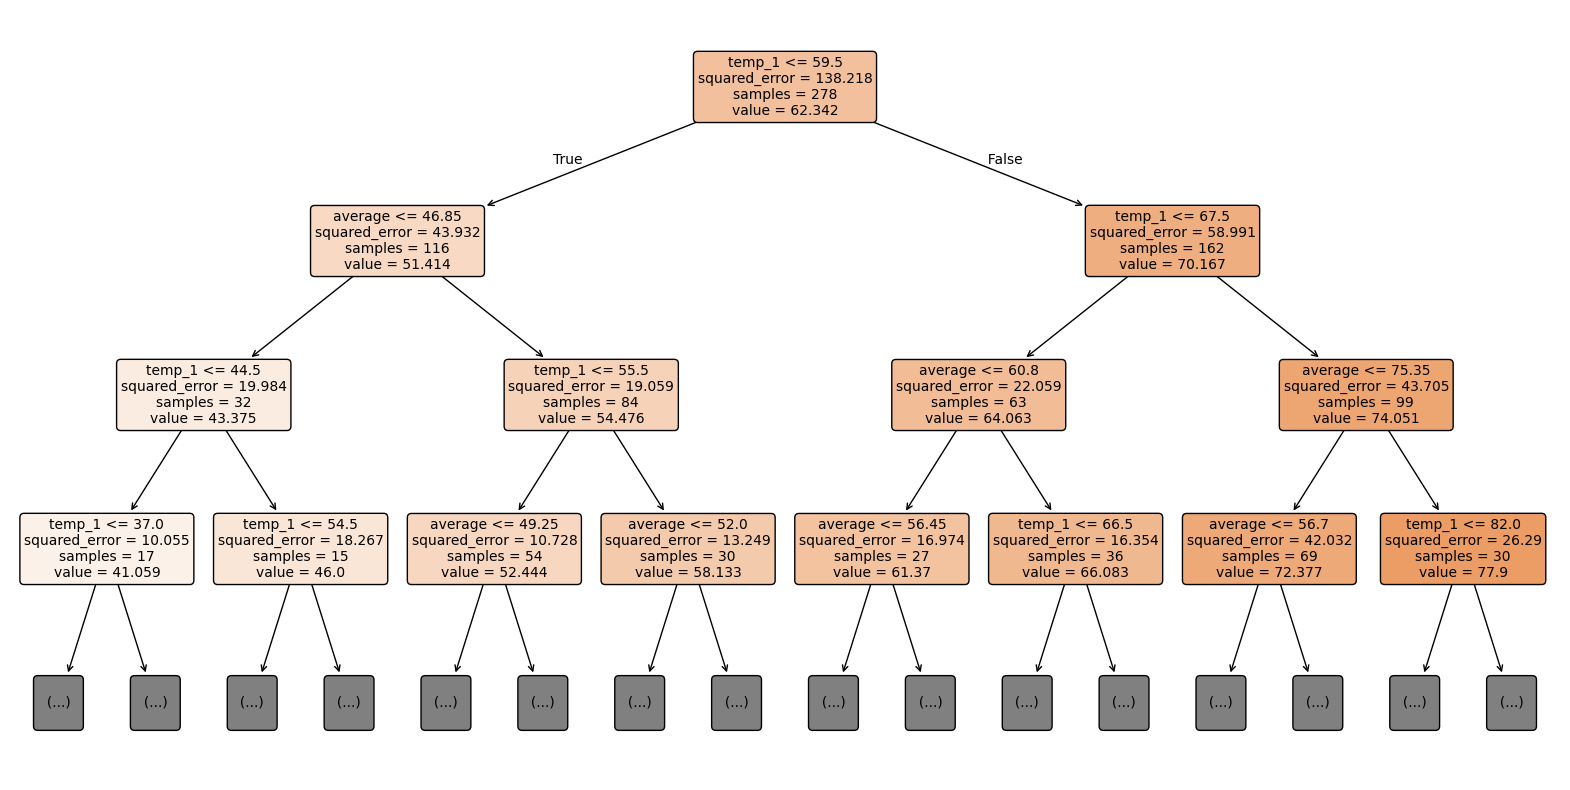

In [64]:
plt.figure(figsize=(20, 10))
# Se muestra con max_depth=3 para legibilidad, aunque el árbol real (tree_reg) es mucho más grande
plot_tree(tree_reg, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=10,
          max_depth=3) 
plt.show()

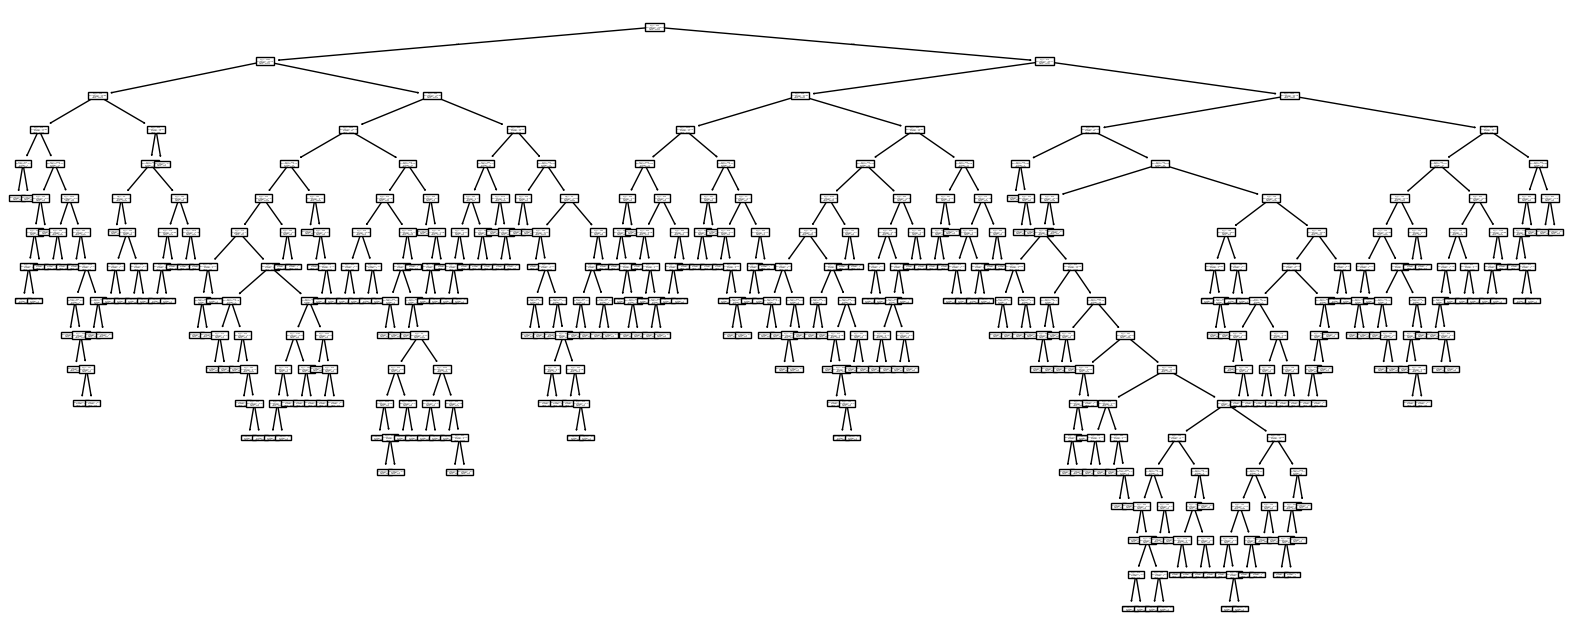

In [66]:
tree_reg.feature_importances_

array([4.44302793e-02, 7.87385320e-01, 1.55361461e-01, 1.11329689e-02,
       1.61189620e-03, 7.80751133e-05])

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [67]:
tree_reg_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_3.fit(X_train, y_train)
tree_reg_3

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### 8. Vuelve a evaluar tu modelo

In [68]:
y_pred_3 = tree_reg_3.predict(X_test)
print(f"MAE test {mean_absolute_error(y_test, y_pred_3)}")
print(f"MAPE test {mean_absolute_percentage_error(y_test, y_pred_3)}")
print(f"MSE test {mean_squared_error(y_test, y_pred_3)}")
print(f"RMSE test {np.sqrt(mean_squared_error(y_test, y_pred_3))}")
print(f"R2 score {r2_score(y_test, y_pred_3)}")

MAE test 4.267242249556827
MAPE test 0.0674392768128964
MSE test 30.946461197509944
RMSE test 5.5629543587476915
R2 score 0.7786776796296856


In [69]:
y_pred_train_3 = tree_reg_3.predict(X_train)
print(f"MAE train {mean_absolute_error(y_train, y_pred_train_3)}")
print(f"MAPE train {mean_absolute_percentage_error(y_train, y_pred_train_3)}")
print(f"MSE train {mean_squared_error(y_train, y_pred_train_3)}")
print(f"RMSE train {np.sqrt(mean_squared_error(y_train, y_pred_train_3))}")
print(f"R2 score {r2_score(y_train, y_pred_train_3)}")

MAE train 3.675752083754991
MAPE train 0.05874668452706153
MSE train 22.14996536445183
RMSE train 4.706374970659672
R2 score 0.8397458755018086


### 9. Vuelve a representar su árbol

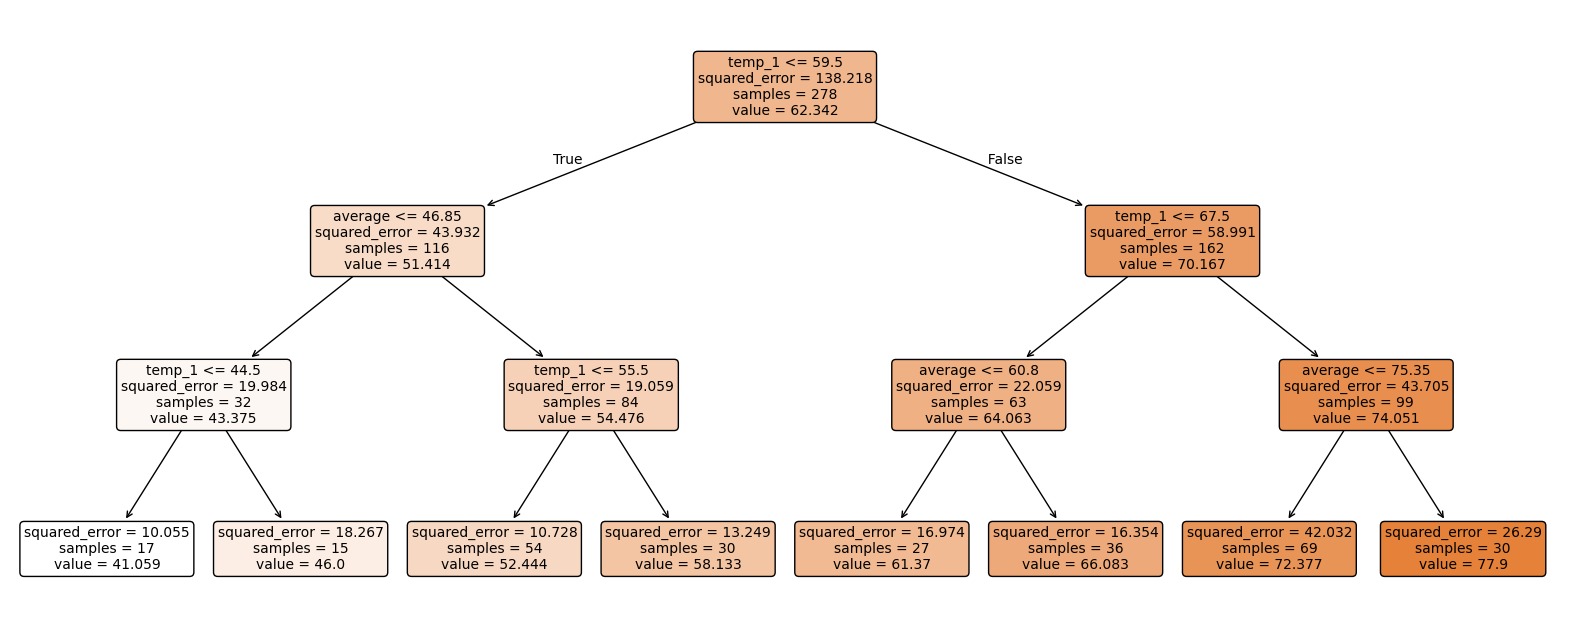

In [70]:
plt.figure(figsize=(20, 8))
plot_tree(tree_reg_3, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()

In [71]:
X.columns

Index(['temp_2', 'temp_1', 'average', 'month_int', 'summer', 'winter'], dtype='object')

In [72]:
tree_reg_3.feature_importances_

array([0.        , 0.88110924, 0.11889076, 0.        , 0.        ,
       0.        ])

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [73]:
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': np.arange(2, 10),
    'min_samples_leaf': [10, 20, 30]
}

tree_reg_gs = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=tree_reg_gs, 
                         param_grid=param_grid, 
                         cv=5, 
                         scoring='neg_mean_absolute_error',
                         verbose=2)

In [74]:
grid_search.fit(X_train, y_train)
grid_search

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=30; 

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': array([2, 3, ..., 6, 7, 8, 9]), 'min_samples_leaf': [10, 20, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'absolute_error'


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=30; 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [10, 20, 30]},
             scoring='neg_mean_absolute_error', verbose=2)

In [76]:
best_tree_reg = grid_search.best_estimator_
print(best_tree_reg)
print(grid_search.best_score_)
print(grid_search.best_params_)

DecisionTreeRegressor(criterion='absolute_error', max_depth=np.int64(4),
                      min_samples_leaf=20, random_state=42)
-4.029058441558442
{'criterion': 'absolute_error', 'max_depth': np.int64(4), 'min_samples_leaf': 20}


DecisionTreeRegressor(criterion='absolute_error', max_depth=np.int64(4),
                      min_samples_leaf=20)
-4.029058441558442
{'criterion': 'absolute_error', 'max_depth': np.int64(4), 'min_samples_leaf': 20}


In [77]:
# Evaluación del mejor modelo de GridSearch en el conjunto de test
y_pred_gs = best_tree_reg.predict(X_test)

print(f"MAE test {mean_absolute_error(y_test, y_pred_gs)}")
print(f"MAPE test {mean_absolute_percentage_error(y_test, y_pred_gs)}")
print(f"MSE test {mean_squared_error(y_test, y_pred_gs)}")
print(f"RMSE test {np.sqrt(mean_squared_error(y_test, y_pred_gs))}")
print(f"R2 score {r2_score(y_test, y_pred_gs)}")

MAE test 4.142857142857143
MAPE test 0.06636974903553941
MSE test 26.292857142857144
RMSE test 5.127656106142176
R2 score 0.8119592377660755


MAE test 4.1
MAPE test 0.06566005427390616
MSE test 25.892857142857142
RMSE test 5.088502445991074
R2 score 0.7786776796296856


In [78]:
# CV del mejor modelo de GridSearchCV
scores_gs = cross_val_score(best_tree_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores_gs)
print(np.mean(scores_gs))
print(np.std(scores_gs))

[-4.02678571 -4.33928571 -4.14285714 -3.61818182 -4.01818182]
-4.029058441558442
0.23585341677566665


[-4.17142857 -6.78571429 -4.05       -3.8115942  -5.47101449]
-4.857950310559007
1.1234837374938589


In [79]:
# CV del modelo con max_depth=3 (baseline)
scores_baseline = cross_val_score(tree_reg_3, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores_baseline)
print(np.mean(scores_baseline))
print(np.std(scores_baseline))

[-3.94958826 -4.32690909 -4.55783267 -4.2831114  -4.15892148]
-4.255272581259286
0.20008789612657607


[-3.66640009 -6.84718382 -4.61461039 -3.8622446  -5.372113  ]
-4.872510379426765
1.156787737533084


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [80]:
best_tree_reg.feature_importances_

array([0.        , 0.83028571, 0.16857143, 0.        , 0.        ,
       0.00114286])

array([0.        , 0.83028571, 0.16971429, 0.        , 0.        ,
       0.        ])

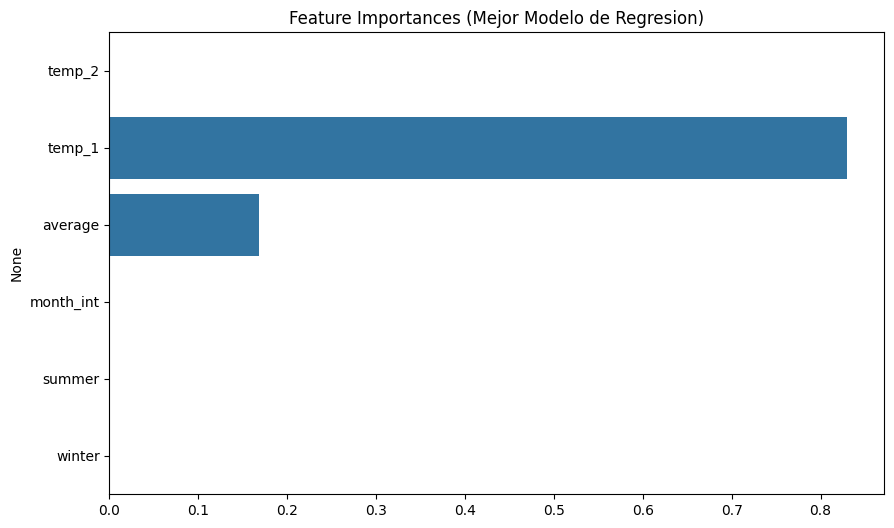

In [82]:
plt.figure(figsize=(10,6))
sns.barplot (x=best_tree_reg.feature_importances_, y=X.columns)
plt.title('Feature Importances (Mejor Modelo de Regresion)')
plt.show()

<Axes: >

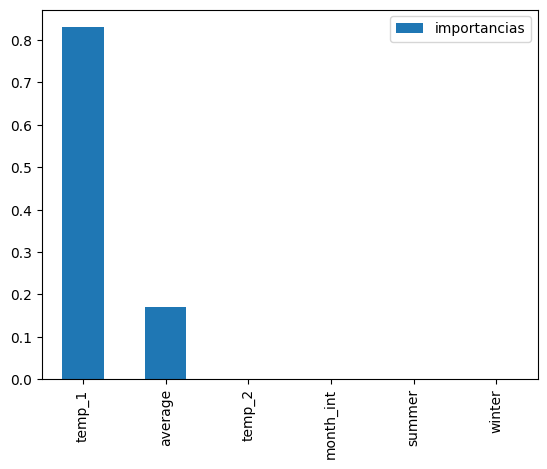

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [84]:
# la descripcion del problema indica 15 C. Los datos estan en Fahrenheit.
# 15 C = (15 * 9/5) + 32 = 59 F
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,month_int,actual_c
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483,3.991379,0.341954,0.163793,0.264368,0.229885,2.798851,0.586207
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179,2.000702,0.475047,0.370621,0.441631,0.421365,0.978029,0.493221
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000,6.000000,1.000000,0.000000,1.000000,0.000000,4.000000,1.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000,7.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,month_int
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483,3.991379,0.261494,0.252874,0.261494,0.224138,6.339080
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179,2.000702,0.440081,0.435285,0.440081,0.417614,3.404518
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000,6.000000,1.000000,1.000000,1.000000,0.000000,9.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000,7.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [86]:
df['actual_c'] = df['actual'].apply(lambda x: 1 if x > 59 else 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,month_int,actual_c
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4,0


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_int,autumn,winter,spring,summer,month_int,actual_c
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,0,1,0,0,4,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,0,1,0,0,4,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,0,1,0,0,4,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,4,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,0,1,0,0,4,0


In [87]:
df['actual_c'].value_counts(normalize=True)

actual_c
1    0.586207
0    0.413793
Name: proportion, dtype: float64

actual_c
1    0.586207
0    0.413793
Name: proportion, dtype: float64

In [89]:
#seleccionamos las variables mas prometedoras de la regresion
features_c = ['average', 'temp_1']
X_c = df[features_c]
y_c = df['actual_c']

X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

print(X_c_train.shape)
print(X_c_test.shape)
print(y_c_train.shape)
print(y_c_test.shape)

(278, 2)
(70, 2)
(278,)
(70,)


(278, 2)
(70, 2)
(278,)
(70,)


In [91]:
param_grid_c = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : np.arange(2,10),
    'min_samples_leaf' : [10,20,30]
}

tree_clf = DecisionTreeClassifier(random_state=42)

grid_search_c = GridSearchCV(estimator=tree_clf, param_grid = param_grid_c , cv=5, scoring= 'accuracy', verbose = 2)

In [92]:
grid_search_c.fit(X_c_train, y_c_train)
grid_search_c

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=30; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_sa

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': array([2, 3, ..., 6, 7, 8, 9]), 'min_samples_leaf': [10, 20, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=30; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [10, 20, 30]},
             scoring='accuracy', verbose=2)

In [93]:
best_tree_clf = grid_search_c.best_estimator_
print(best_tree_clf)
print(grid_search_c.best_score_)
print(grid_search_c.best_params_)

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(3),
                       min_samples_leaf=10, random_state=42)
0.8957142857142857
{'criterion': 'entropy', 'max_depth': np.int64(3), 'min_samples_leaf': 10}


DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(3),
                       min_samples_leaf=10)
0.8957142857142857
{'criterion': 'entropy', 'max_depth': np.int64(3), 'min_samples_leaf': 10}


In [94]:
y_c_pred = best_tree_clf.predict(X_c_test)

print(f"accuracy_score {accuracy_score(y_c_test, y_c_pred)}")
print(f"precision_score {precision_score(y_c_test, y_c_pred)}")
print(f"recall_score {recall_score(y_c_test, y_c_pred)}")
print(f"f1_score {f1_score(y_c_test, y_c_pred)}")
print(f"roc_auc_score {roc_auc_score(y_c_test, y_c_pred)}")
print("confusion_matrix")
print(confusion_matrix(y_c_test, y_c_pred))

accuracy_score 0.9
precision_score 0.8723404255319149
recall_score 0.9761904761904762
f1_score 0.9213483146067416
roc_auc_score 0.8809523809523809
confusion_matrix
[[22  6]
 [ 1 41]]


accuracy_score 0.9
precision_score 0.8723404255319149
recall_score 0.9761904761904762
f1_score 0.9213483146067416
roc_auc_score 0.8809523809523809
confusion_matrix
 [[22  6]
 [ 1 41]]


In [95]:
scores_clf = cross_val_score(best_tree_clf, X_c_train, y_c_train, cv=5, scoring='accuracy')
print(scores_clf)
print(np.mean(scores_clf))
print(np.std(scores_clf))

[0.92857143 0.91071429 0.83928571 0.89090909 0.90909091]
0.8957142857142857
0.03062939588134242


[0.67142857 0.88571429 0.58571429 0.91304348 0.86956522]
0.7850931677018633
0.1313796008286965


In [96]:
best_tree_clf.feature_importances_

array([0.84923684, 0.15076316])

array([0.15076316, 0.84923684])

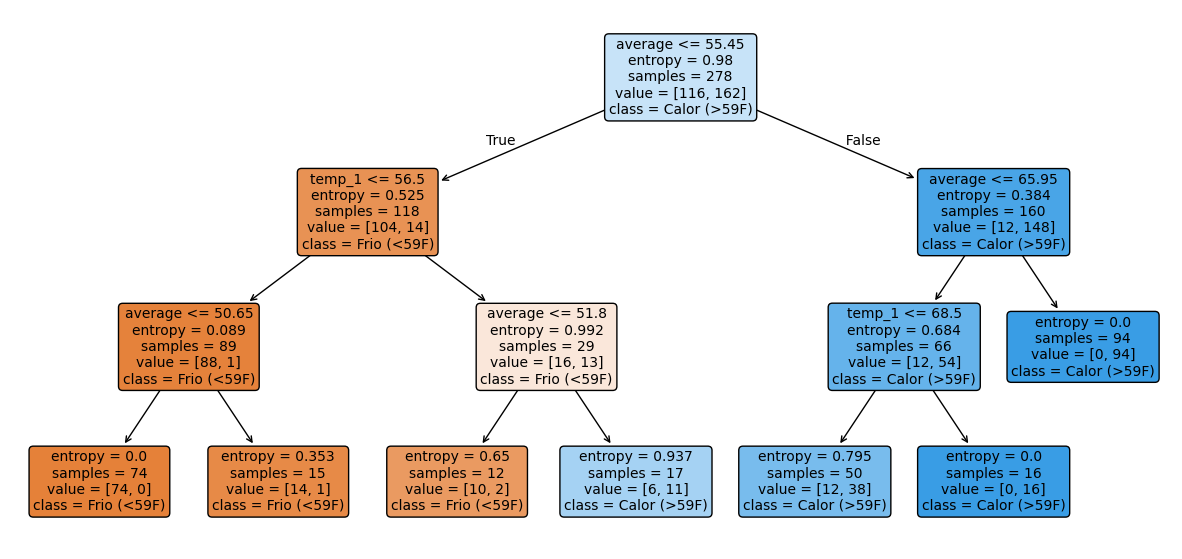

In [97]:
plt.figure(figsize=(15, 7))
plot_tree(best_tree_clf, 
          feature_names=X_c.columns, 
          class_names=['Frio (<59F)', 'Calor (>59F)'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()

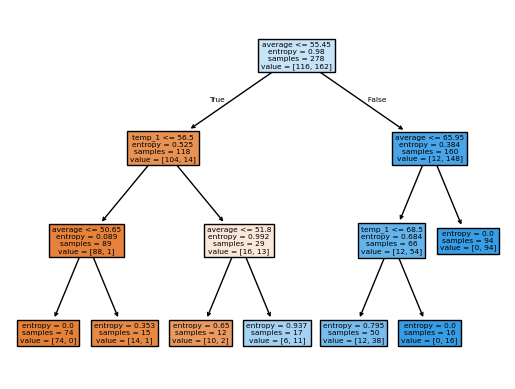

### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [98]:
# Usamos los mismos X_c, y_c
param_grid_rf = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [10, 20, 30]
}

rf_clf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_clf, 
                            param_grid=param_grid_rf, 
                            cv=5, 
                            scoring='accuracy',
                            verbose=2)

In [99]:
grid_search_rf.fit(X_c_train, y_c_train)

best_rf_clf = grid_search_rf.best_estimator_
print(best_rf_clf)
print(grid_search_rf.best_score_)
print(grid_search_rf.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=10, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=10, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=10, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=10, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=10, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=10, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=10, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=10, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=10, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=10, n_estimators=20

Fitting 5 folds for each of 144 candidates, totalling 720 fits
RandomForestClassifier(criterion='entropy', max_depth=np.int64(4),
                       min_samples_leaf=10)
0.9246103896103897
{'criterion': 'entropy', 'max_depth': np.int64(4), 'min_samples_leaf': 10, 'n_estimators': 100}


In [100]:
y_c_pred_rf = best_rf_clf.predict(X_c_test)

print(f"accuracy_score {accuracy_score(y_c_test, y_c_pred_rf)}")
print(f"precision_score {precision_score(y_c_test, y_c_pred_rf)}")
print(f"recall_score {recall_score(y_c_test, y_c_pred_rf)}")
print(f"f1_score {f1_score(y_c_test, y_c_pred_rf)}")
print(f"roc_auc_score {roc_auc_score(y_c_test, y_c_pred_rf)}")
print("confusion_matrix")
print(confusion_matrix(y_c_test, y_c_pred_rf))

accuracy_score 0.9
precision_score 0.8723404255319149
recall_score 0.9761904761904762
f1_score 0.9213483146067416
roc_auc_score 0.8809523809523809
confusion_matrix
[[22  6]
 [ 1 41]]


accuracy_score 0.9428571428571428
precision_score 0.9318181818181818
recall_score 0.9761904761904762
f1_score 0.9534883720930233
roc_auc_score 0.9345238095238096
confusion_matrix
 [[25  3]
 [ 1 41]]


In [101]:
# Probando la predicción de probabilidad para la primera muestra de test
best_rf_clf.predict_proba(X_c_test.iloc[0:1])

array([[0.03957088, 0.96042912]])

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.55503652, 0.44496348]])

In [102]:
best_rf_clf.feature_importances_

array([0.50736055, 0.49263945])

array([0.5096769, 0.4903231])